In [1]:
from tickcounter.survey import *
from tickcounter.questionnaire import *

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("D:/Personal_Project/tickcounter/test/test_data/starbucks_survey/Starbucks satisfactory survey.csv")
full = pd.read_csv("D:/Datasets/archive (2)/Starbucks satisfactory survey.csv")

In [4]:
df

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,...,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,...,3,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,118,0,3,1,1,2,0,2,1,0,...,4,1,1,1,1,1,1,1,1,0
109,119,0,1,2,0,2,0,2,1,0,...,5,1,1,1,1,1,1,1,1,0
110,120,0,1,0,0,3,0,1,1,1,...,4,1,1,1,1,1,1,1,1,1
111,121,1,1,2,0,3,2,0,0,1,...,4,1,1,1,1,1,1,1,1,0


Note that in a fully encoded dataset, it can be difficult to interpret the values, especially during visualization. Here we will use a `Description` object to visualize a more verbose graph later.

In [5]:
descrip = Description("D:/Personal_Project/tickcounter/descrip.yaml")

In [6]:
# Below is the content of descrip.yaml

# gender:
#   description: "Gender"
#   values:
#     0: "Male"
#     1: "Female"
# age:
#   description: "Age"
#   values:
#     0: "Below 20"
#     1: "From 20 to 29"
#     2: "From 30 to 39"
#     3: "40 and above"
# status:
#   description: "Are you currently....?"
#   values:
#     0: "Student"
#     1: "Self-employed"
#     2: "Employed"
#     3: "Housewife"
# income:
#   description: "What is your annual income?"
#   values:
#     0: "Less than RM25,000"
#     1: "RM25,000 - RM50,000"
#     2: "RM50,000 - RM100,000"
#     3: "RM100,000 - RM150,000"
#     4: "More than RM150,000"
# visitNo:
#   description: "How often do you visit Starbucks?"
#   values:
#     0: "Daily"
#     1: "Weekly"
#     2: "Monthly"
#     3: "Rarely"
# method:
#   description: "How do you usually enjoy Starbucks?"
#   values:
#     0: "Dine in"
#     1: "Drive-thru"
#     2: "Take away"
#     5: "Never"
# membershipCard:
#   description: "Do you have Starbucks membership card?"
#   values:
#     0: "No"
#     1: "Yes"
# serviceRate:
#   description: "How would you rate the service at Starbucks?"
# priceRate:
#   description: "How would you rate the price range at Starbucks?"

In [7]:
# The num_col and cat_col are truncated for illustration purpose.
sv = Survey(data=df, 
            num_col=['chooseRate', 'productRate', 'priceRate', 'wifiRate'], 
            cat_col=['method', 'loyal','visitNo', 'membershipCard', 'status', 'gender', 'age', 'income'], 
            description=descrip)

First let's visualize the graphs without using `Description`.

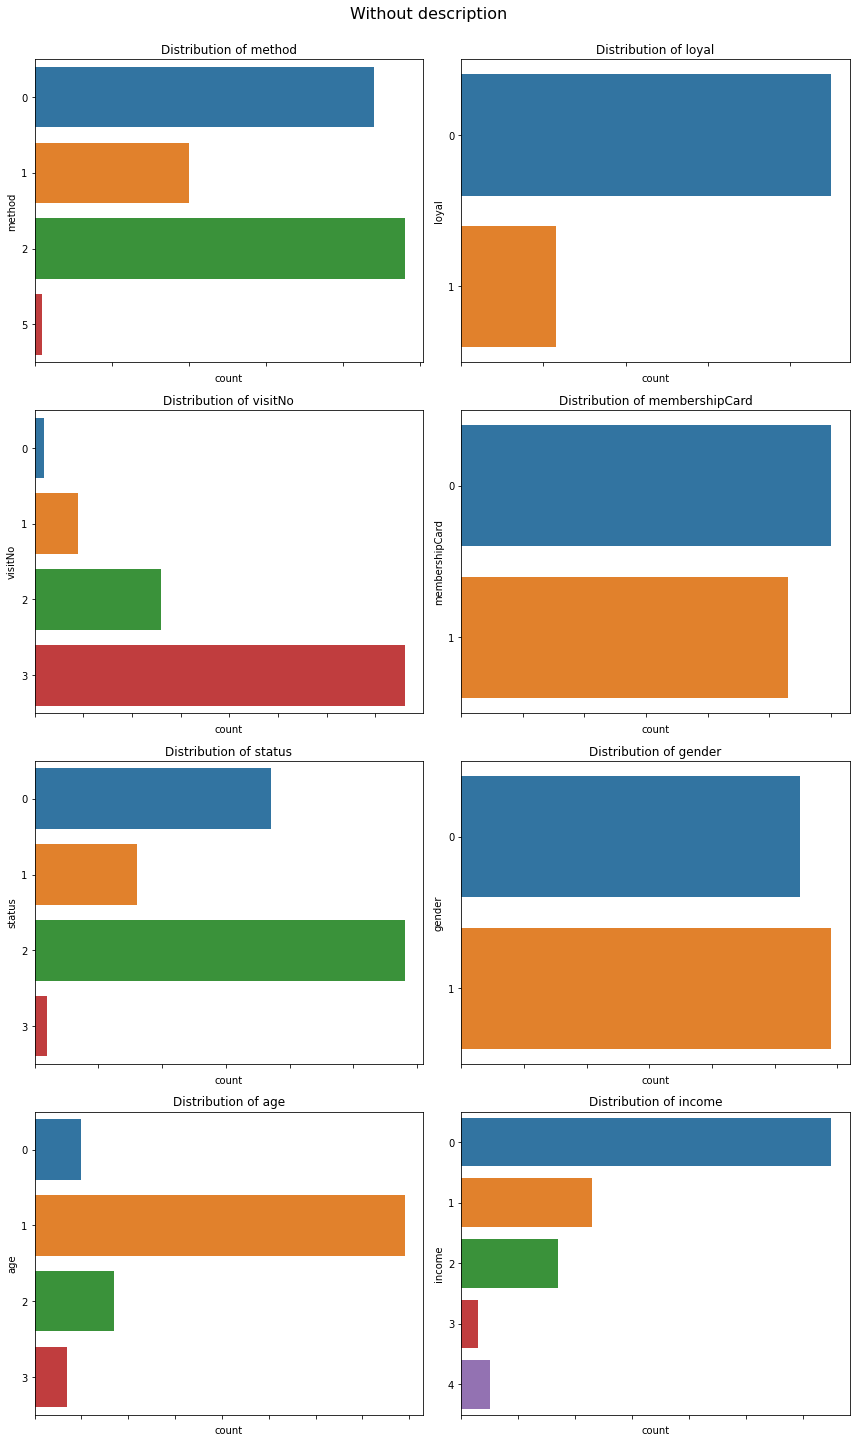

In [8]:
sv.count_cat(orient='horizontal', rotate=True, figsize=(12, 20), title="Without description", y=1)

Note that it is difficult in understanding the graphs without checking what each value means stored in some kind of translation text. Instead of switching back and forth between graphs and translation, `Description` makes the graphs more self-contained and easy to read.

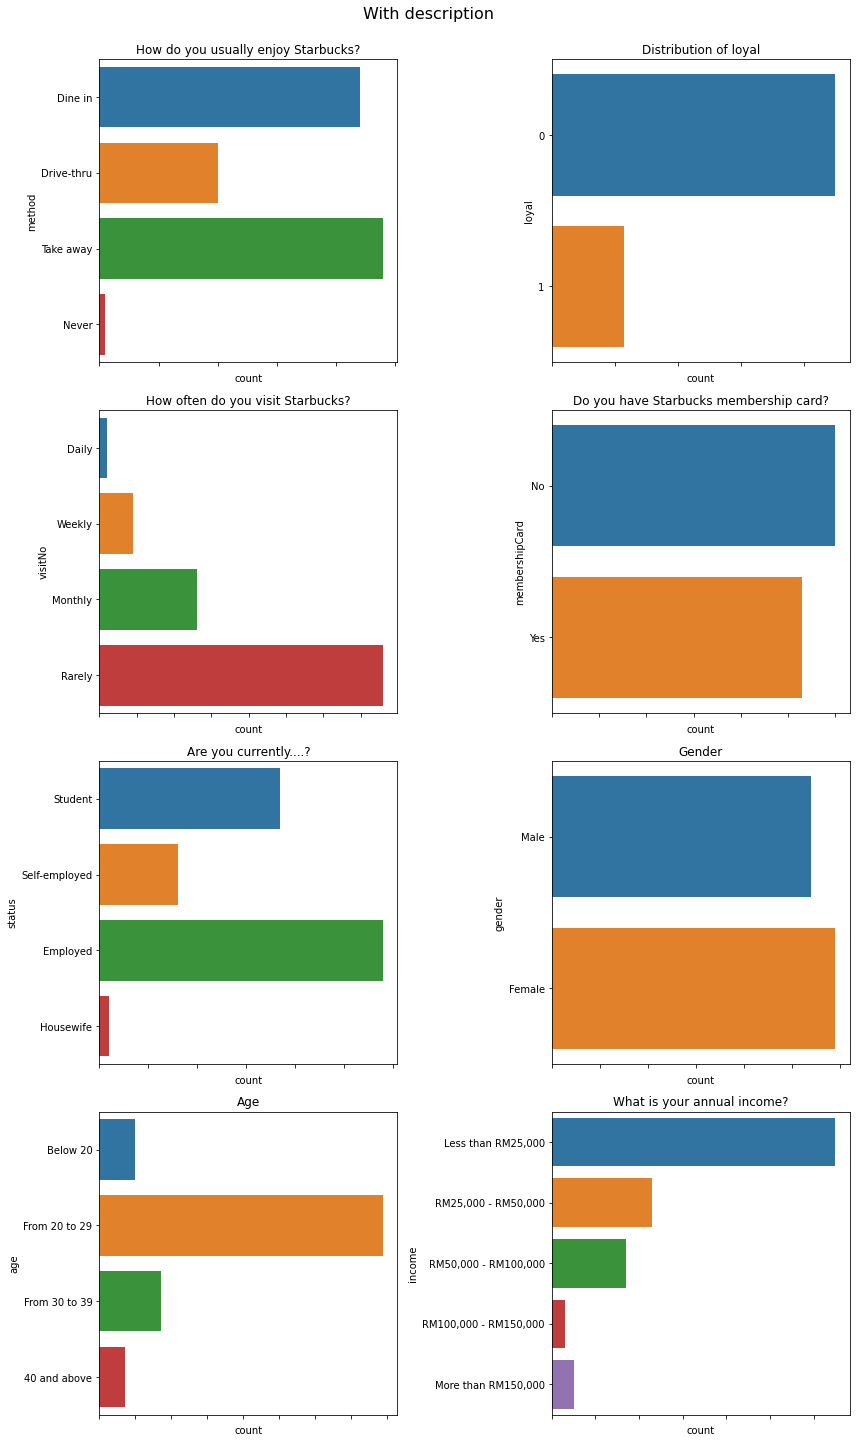

In [9]:
sv.count_cat(orient='horizontal', rotate=True, figsize=(12, 20), descrip_value=True, descrip_title=True, title="With description", y=1)

Aside from translating the title and values, `Description` can also translate legends.

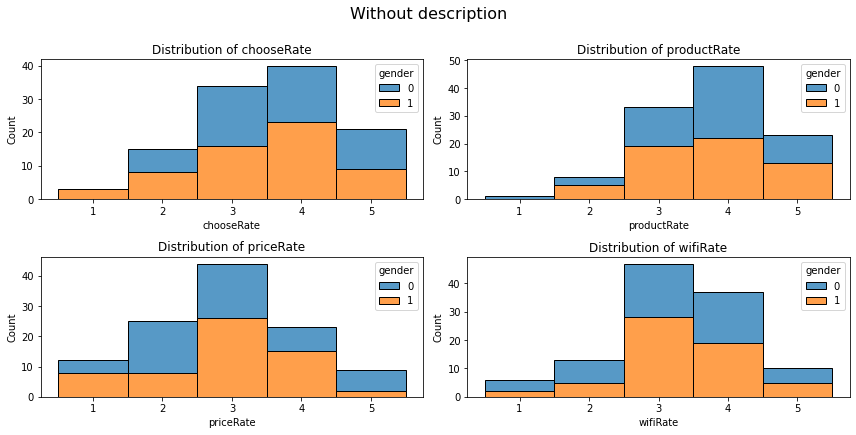

In [10]:
sv.hist_num(discrete=True, figsize=(12, 6), hue='gender', multiple='stack', title="Without description", y=1)

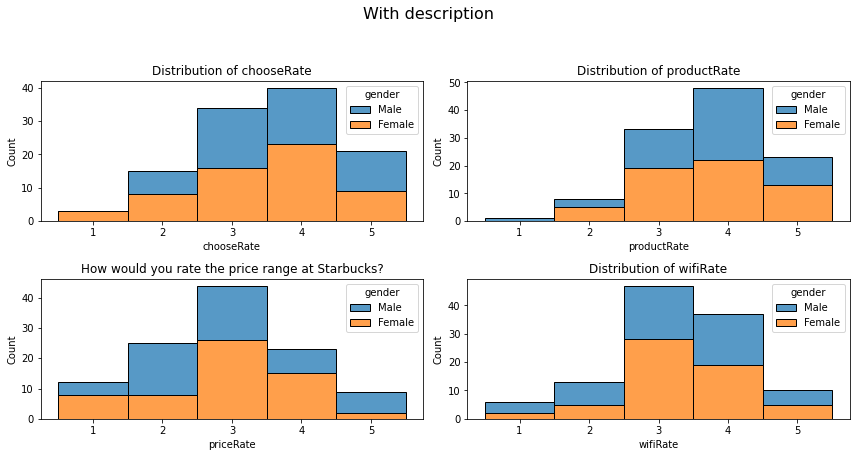

In [11]:
sv.hist_num(discrete=True, figsize=(12, 6), hue='gender', multiple='stack', title="With description", descrip_title=True, descrip_legend=True)

### auto_detect()

Survey supports `auto_detect` method, which automatically look for significant statistical relationship between any two group. The effect size can be configured as a filter on result findings returned. This method may be useful for exploratory data analysis on restricted number of columns.

In [12]:
result = sv.auto_detect()

Ignoring groups [5] when comparing chooseRate and method
Ignoring groups [1, 0] when comparing chooseRate and visitNo
Ignoring groups [1, 3] when comparing chooseRate and status
Ignoring groups [2, 0, 3] when comparing chooseRate and age
Skipping comparing chooseRate and age, only one group available
Ignoring groups [2, 4, 3] when comparing chooseRate and income
Ignoring groups [5] when comparing productRate and method
Ignoring groups [1, 0] when comparing productRate and visitNo
Ignoring groups [1, 3] when comparing productRate and status
Ignoring groups [2, 0, 3] when comparing productRate and age
Skipping comparing productRate and age, only one group available
Ignoring groups [2, 4, 3] when comparing productRate and income
Ignoring groups [5] when comparing priceRate and method
Ignoring groups [1, 0] when comparing priceRate and visitNo
Ignoring groups [1, 3] when comparing priceRate and status
Ignoring groups [2, 0, 3] when comparing priceRate and age
Skipping comparing priceRate a

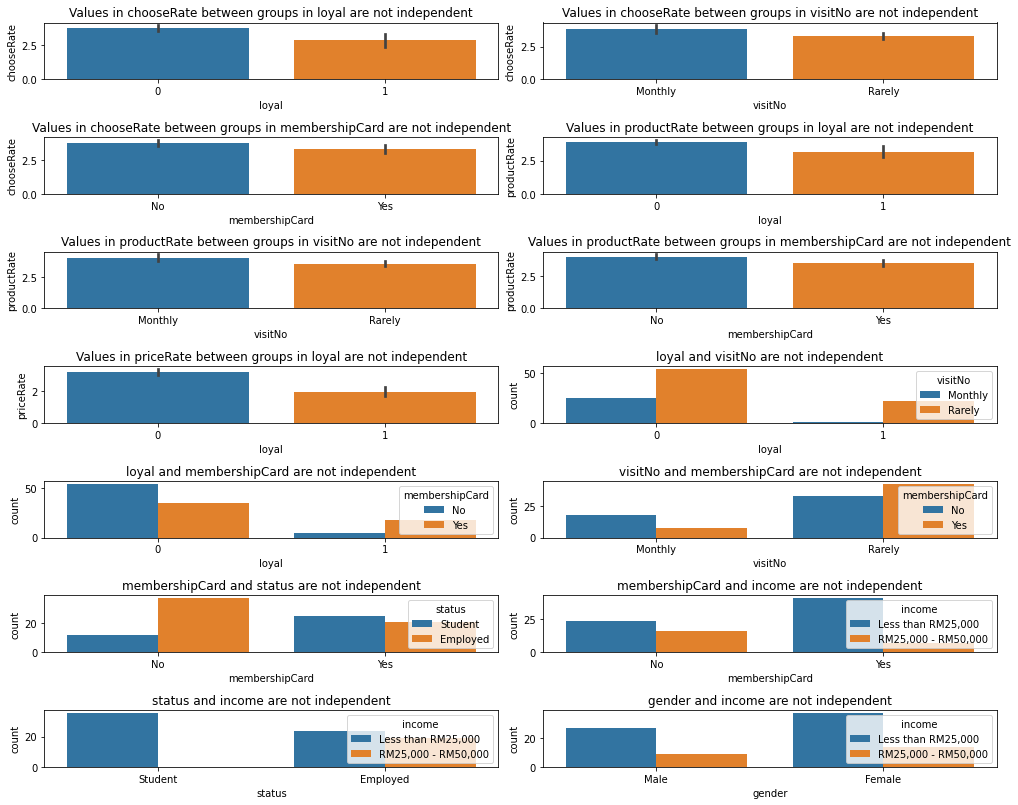

In [13]:
result.illustrate(n_col=2, figsize=(14, 22), descrip_value=True, tight_layout=True, descrip_legend=True)

In [14]:
result.describe()

0     In column loyal, the mean of chooseRate for 0 ...
1     In column visitNo, the mean of chooseRate for ...
2     In column membershipCard, the mean of chooseRa...
3     In column loyal, the mean of productRate for 0...
4     In column visitNo, the mean of productRate for...
5     In column membershipCard, the mean of productR...
6     In column loyal, the mean of priceRate for 0 (...
7     loyal (with categories [0, 1]) and visitNo (wi...
8     loyal (with categories [0, 1]) and membershipC...
9     visitNo (with categories [3, 2]) and membershi...
10    membershipCard (with categories [0, 1]) and st...
11    membershipCard (with categories [0, 1]) and in...
12    status (with categories [2, 0]) and income (wi...
13    gender (with categories [1, 0]) and income (wi...
dtype: object